In [7]:
from google.colab import files
uploaded = files.upload()

Saving email.csv to email (1).csv


In [91]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud
import re
import nltk
from nltk.corpus import stopwords
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, ConfusionMatrixDisplay

In [148]:
df = pd.read_csv('/content/email.csv')


In [152]:
df.head(5)

,category,message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [153]:
df = df.rename(columns={
    'Category':'category',
    'Message' : 'message'
})

In [155]:
df['category'].value_counts()

,count
category,
ham,4825
spam,747
"{""mode"":""full""",1


In [156]:
# Remove rows with invalid categories
valid_categories = ['ham', 'spam']
df = df[df['category'].isin(valid_categories)]
df.shape

(5572, 2)

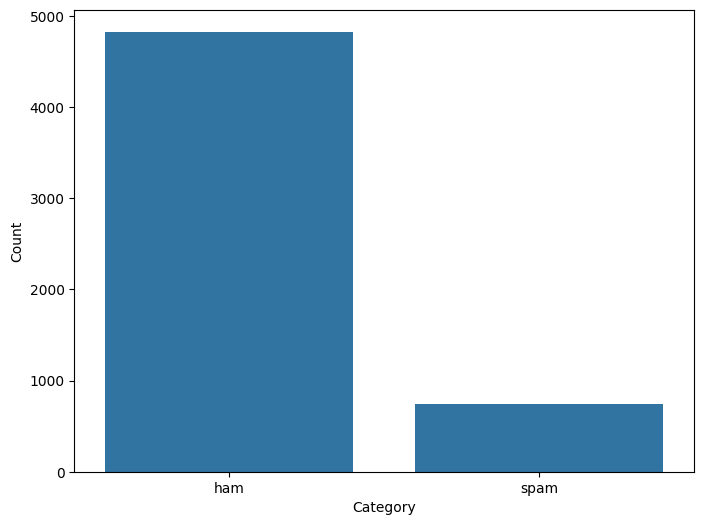

In [157]:
plt.figure(figsize=(8,6))
sns.countplot(data=df,x='category')
plt.xlabel('Category')
plt.ylabel('Count')
plt.show()

In [158]:
df['category'] = df['category'].map({'ham': 0, 'spam': 1})


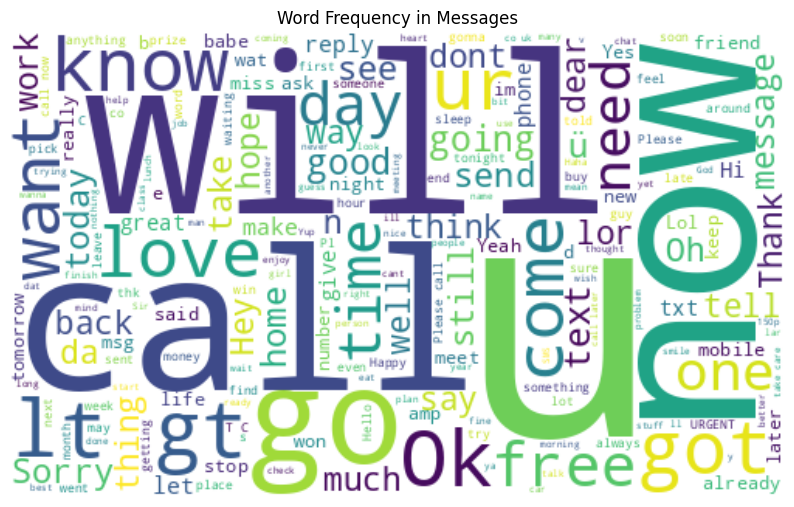

In [159]:
# Combine messages into a single text
text = ' '.join(df['message'])

# Generate a word cloud
wordcloud = WordCloud(width=500, height=300, background_color='white').generate(text)

# Display the word cloud
plt.figure(figsize=(10, 8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Frequency in Messages')
plt.show()

In [160]:
df['message'] = df['message'].str.replace(r'[^a-zA-Z\s]', '', regex=True)
df['message'] = df['message'].str.lower()

In [161]:
df['message'].head()

,message
0,go until jurong point crazy available only in ...
1,ok lar joking wif u oni
2,free entry in a wkly comp to win fa cup final...
3,u dun say so early hor u c already then say
4,nah i dont think he goes to usf he lives aroun...


#### Tokenization

In [162]:
nltk.download('punkt')  # This will download the 'punkt' tokenizer


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [163]:
from nltk.tokenize import word_tokenize

df['message'] = df['message'].apply(lambda x: word_tokenize(x))
df['message']

,message
0,"[go, until, jurong, point, crazy, available, o..."
1,"[ok, lar, joking, wif, u, oni]"
2,"[free, entry, in, a, wkly, comp, to, win, fa, ..."
3,"[u, dun, say, so, early, hor, u, c, already, t..."
4,"[nah, i, dont, think, he, goes, to, usf, he, l..."
...,...
5567,"[this, is, the, nd, time, we, have, tried, con..."
5568,"[will, b, going, to, esplanade, fr, home]"
5569,"[pity, was, in, mood, for, that, soany, other,..."
5570,"[the, guy, did, some, bitching, but, i, acted,..."


#### Remove stopwords

In [164]:
nltk.download('stopwords')
stop_words = set(stopwords.words('english'))
df['message'] = df['message'].apply(lambda x: [word for word in x if word not in stop_words])
df['message']


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


,message
0,"[go, jurong, point, crazy, available, bugis, n..."
1,"[ok, lar, joking, wif, u, oni]"
2,"[free, entry, wkly, comp, win, fa, cup, final,..."
3,"[u, dun, say, early, hor, u, c, already, say]"
4,"[nah, dont, think, goes, usf, lives, around, t..."
...,...
5567,"[nd, time, tried, contact, u, u, pound, prize,..."
5568,"[b, going, esplanade, fr, home]"
5569,"[pity, mood, soany, suggestions]"
5570,"[guy, bitching, acted, like, id, interested, b..."


In [165]:
df['message'] = df['message'].apply(lambda x: ' '.join(x))


#### Feature Engineering

In [166]:
from sklearn.feature_extraction.text import TfidfVectorizer,CountVectorizer

vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(df['message'])


In [167]:
y =df['category']

In [168]:
y

,category
0,0
1,0
2,1
3,0
4,0
...,...
5567,1
5568,0
5569,0
5570,0


In [169]:
X.shape

(5572, 8476)

#### Naive Bayes

In [170]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3, random_state=42)


In [171]:
%%time
clf = MultinomialNB()
clf.fit(X_train,y_train)

CPU times: user 5.58 ms, sys: 0 ns, total: 5.58 ms
Wall time: 5.6 ms


MultinomialNB()

In [172]:
y_pred = clf.predict(X_test)


In [173]:
print(f"Accuracy : {accuracy_score(y_test,y_pred)}")

Accuracy : 0.9647129186602871


In [174]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.96      1.00      0.98      1448
           1       1.00      0.74      0.85       224

    accuracy                           0.96      1672
   macro avg       0.98      0.87      0.91      1672
weighted avg       0.97      0.96      0.96      1672



Confusion Matrix:
[[1448    0]
 [  59  165]]


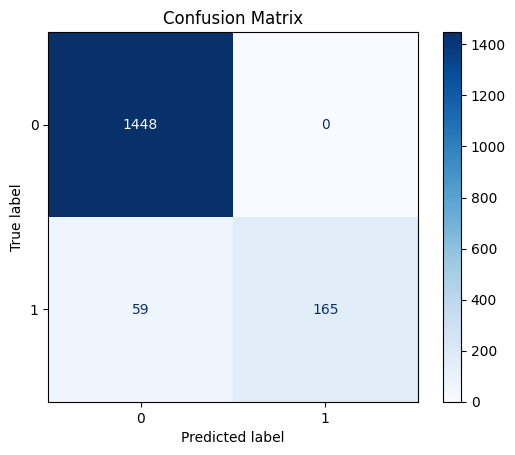

In [175]:
# Confusion Matrix
cm = confusion_matrix(y_test, y_pred, labels=[0, 1])
print("Confusion Matrix:")
print(cm)

# Plot Confusion Matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=[0, 1])
disp.plot(cmap='Blues')
plt.title('Confusion Matrix')
plt.show()

#### SVC

In [176]:
from sklearn.svm import SVC


In [177]:
clf = SVC(kernel='linear',random_state = 42)
clf.fit(X_train, y_train)

SVC(kernel='linear', random_state=42)

In [178]:

# Make predictions
y_pred = clf.predict(X_test)

# Evaluate the model
print("Classification Report:\n", classification_report(y_test, y_pred))


Classification Report:
               precision    recall  f1-score   support

           0       0.98      1.00      0.99      1448
           1       0.98      0.89      0.93       224

    accuracy                           0.98      1672
   macro avg       0.98      0.94      0.96      1672
weighted avg       0.98      0.98      0.98      1672

Confusion Matrix:
 [[1443    5]
 [  25  199]]


Confusion Matrix:
[[1443    5]
 [  25  199]]


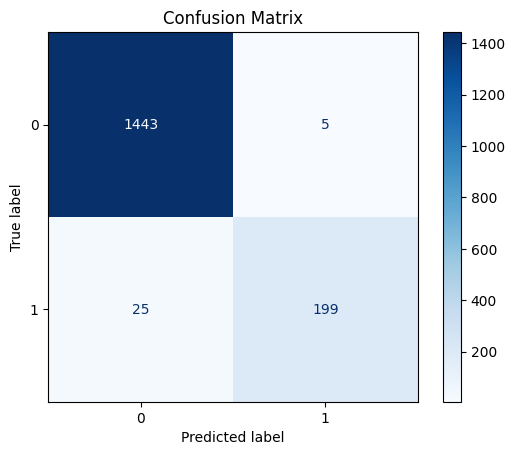

In [179]:
# Confusion Matrix
cm = confusion_matrix(y_test, y_pred, labels=[0, 1])
print("Confusion Matrix:")
print(cm)

# Plot Confusion Matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=[0, 1])
disp.plot(cmap='Blues')
plt.title('Confusion Matrix')
plt.show()

In [180]:
print(f"Accuracy : {accuracy_score(y_test,y_pred)}")

Accuracy : 0.9820574162679426
